<span style='color:red;background-color:yellow;font-weight:bold;'>+ start n-step model with: time normalization</span>

<span style='color:red;background-color:yellow;font-weight:bold;'>+ n-step model width vs CHT width</span>

<span style='color:red;background-color:yellow;font-weight:bold;'>+ explicitly mention and refer to Cox Ross Rubinstein (1979)</span>

<span style='color:red;background-color:yellow;font-weight:bold;'>+ tests: p-c parity</span>

<span style='color:red;background-color:yellow;font-weight:bold;'>+ Black Derman Toy (1990)</span>

# Introduction

## Markovian process and Martingale

###### Markovian process

A random process in which the next step depends only on the current state, not on any past states. 

###### Martingale

A random process in which the expectation value after the current step equals the current value.

## Arbitrage and Risk-neutral pricing

* `Arbitrage` means that different paths between the same two end points can give determinstically different profits.
<br/>
Example (FX arbitrage): exchanging 1 USD $\rightarrow$ EUR $\rightarrow$ GBP always brings you more than 1 USD $\rightarrow$ GBP 


* In an ideal world: all information is immediately available to everyone, so there is no arbitrage.


* `Risk-neutral pricing`:
  * The PV is <b>calculated by</b> as a probability-weighted sum (discounting) of all future possible values.
  * No additional price is requested for high volatility / risk.

## European call option, terminology, notations
 
A call option is an agreement that gives an investor the right, but not the obligation, to buy the underlying for the strike price at the date of maturity.

* Underlying asset
  - stock index, futures, commodity, currency, index
  - price of the derivative is based on the underlying

* Maturity
  - date on which the life of a financial instrument ends
  - also called: date of expiry

* Price of underlying
  - price of underlying now: $S_{\ 0}$
  - at maturity: $S_{\ T}$
  - price of the underlying at time $\,t\,$ is $\,S_{\ t}$

* Price of option:
  - also called: premium that you pay for the option
  - the amount you pay when you buy an option
    - note: selling the option is also called "writing" the option

* "Moneyness" at a selected time point
  - ATM (at the money): $\ S_{\ t}=K$
  - Out of the money (of a call option): $\ S_{\ t}<K$
  - In the money (call option): $\ S_{\ t}>K$

* Intrinsic value of an option
  - At time $\ t\ $ this is the signed amount by which the option is in the money or out of the money: $\ S_{\ t} - K $

* Possible excercise dates are described with geographical terms:
  - European: can be exercised only at the date of expiry
  - American: can be excercised at any time point between the date of the contract and the date of the expiry
  - Bermudan: fixed dates
  
* Payoff
  - The amount that the writer pays to the buyer at the time of maturity:  $\ \max(\ S_{\ T} - K,\ 0\ ) $

![Call option payoff](./img/call-payoff.png "Call option payoff")

## Vanilla options vs Exotic options

###### Vanilla

The option's payoff depends **only** on the underlying's start price and end price.<br/>
In other words: the underlying's spot price and its price at maturity.

###### Exotic

The price of the option depends also on intermediate prices of the underlying.<br/>
In other words: the path of underlying matters too.

###### Example

*A (binary) Vanilla option*

Next Sunday, if the weather is nice, Alesia will have an icecream.

*A (knock-out) Exotic option*

If the weather is nice next Sunday, and Alesia **does not** catch a cold during the week, then she will have an icecream.

###### Theoretical illustration

<br/>

<center>
    <img src="./img/vanilla-exotic.png" width="600" alt="Comparison of Vanilla options and Exotic options">
    <br/>
    Comparison of Vanilla options and Exotic options
</center>

# Binomial tree model for option pricing

Discretized version of continuous time process: 
- at each time step the price of the underlying goes either up or down
- with an increasing number of steps (tree size), the tree's results converge to the continuous results (Black-Scholes)
- many-step binomial tree's center approximates well the center of the lognormal distribution
  - see: random walk up vs down with probabilities $\ p\ $ vs $\ (1-p)\ $
- real price change distributions are often close to lognormal
  - main corrections to this will come after Black-Scholes-Merton pricing of call option
  
## Binomial tree pricer for a European call option

We will calculate with the binomial tree pricer the Present Value (PV) of a European call option on an underlying stock. 

We will use the following main assumptions: 
* The option's underlying stock pays no dividends.
* There are no taxes or other fees associated with selling or buying the underlying.
* We can determine the risk-free rate.
* Everyone in the market uses risk-neutral pricing:
  * The PV of a future event is a linear combination of the values of that event's possible outcomes discounted with risk-free rate. 
  * The linear combination coefficients are the probabilities of the outcomes.
* Any amount of the underlying can be purchased or sold at any time at zero cost.

###### Refresher Questions
* What is the future event for which we are calculating the PV here ?
* What are the possible outcomes of that future event ?
* What are the probabilities of those future outcomes ?
* Is the European call option a vanilla option or an exotic option ?

# One-step binomial tree

`Risk-neutral` pricing of a European call option on a non-dividend paying underlying stock

1. Make reasonable assumptions, in other words: set up a model.
2. With this model calculate the call option's expected payoff (which will happen at maturity).
3. Discount this calculated payoff to the present to obtain the current fair value.

###### Definitions / Notations

At time $\,t=0\,$
* the price of the underlying stock is $\,S_{\,0}\,$,
* the risk-free rate is $\,r\,$,
* we know how to discount the payoff at maturity (time $\,T\,$) to the current time ($\,t=0\,$).

###### Model description (S underlier price, f: option price)

To calculate the `current Fair Value`, $\,f\,$, of the call option's payoff (which will happen at maturity), we select 
<br/>
the simplest non-trivial simplification for the time evolution of the stock with the parameters $\,0<d<1<u\,$:
* with probability $\,0<p<1\,$ the price will go up to $\,u\,S_{\,0}\,$ 
* and with probability $\,1-p\,$ the price will go down to $\,d\,S_{\,0}\,$

Denote by $\,f_u\,$ the option's payoff in the "u" (up) final state, and by $\,f_d\,$ in the lower (down) final state.

<br/>

<center>
    <img src="./img/binom.png" width="300" alt="The one-step binomial tree pricer model">
    <br/>
    The one-step binomial tree pricer model
</center>

###### What is the meaning of the parameters $\,u\,$ and $\,d\,$ ?

Assume that we know from a recent time window the stock's past growth rate, $\,m\,$, and volatility, $\,\sigma\,$.

The values  $\,d\,S_{\,0}\,$ to $\,u\,S_{\,0}\,$ should include the range of the stock's price at maturity.
<br/>
With the previously known $\,m\,$ and $\,\sigma\,$ values, this can be written as the following two conditions:
<br/>
$\,\,\,\,$ $d\,S_{\,0} < \,S_{\,0} + m\,T - \sigma\,\sqrt{T\,}\,$ $\,\,$ and $\,\,$  $\,S_{\,0} + m\,T + \sigma\,\sqrt{T\,} < u\,S_{\,0}\,$.


###### Reducing the number of parameters

1. From this point on, let's use  $ \,u\,\cdot\,d=1\,$, in other words, $\,\color{red}{d=u^{\,-1}}\,$.


2. In this simplest form, the binomial tree model contains no additional information about the underlying stock, 
<br/>
therefore, the stock's expectation value grows with the `risk-free rate`. Moreover, we are using the `risk-neutral metric`,
<br/>
so the present value equals the (risk-free rate) discounted, probability-weighted sum of final values:
<br/>  
$\,p\,u\,S_{\,0} + \left(\,1-p\,\right)\,d\,S_{\,0}=S_{\,0}\,e^{\,r\,T}\,$.
<br/>
For the "step up" probability, $\,p\,$, this gives: 
$\,\color{red}{\displaystyle{p=\frac{e^{\,r\,T}-d}{u-d}}}\,$.


###### Solution

At maturity, if we are in the upper state (node), then the payoff is $\,f_u=\max\left(\,0\,,\,u\,S_{\,0}-K\,\right)\,$,
<br/>
and in the lower node the payoff at maturity is $\,f_d=\max\left(\,0\,,\,d\,S_{\,0}-K\,\right)\,$.


According to the model, going to the upper node (or lower node) has a probability of $\,p\,$ (or $\,1-p\,$) ,
<br/>
so the expected payoff at maturity is $\,p\,f_u + \left(\,1-p\,\right)\,f_d\,$.


Discounting this payoff from time $\,T\,$ (maturity) to now (time $\,t=0\,$) gives the call option's value:
<br/>
$\color{red}{f=\big(\,p\,f_u + \left(\,1-p\,\right)\,f_d\,\big)\,e^{\,-\,r\,T\,}}\,$.

## Pricer function

###### Tasks
1. With very small or very large  $\,r \cdot T\,$  how much do you think the price of the option will be ?  
2. What does  $\,e^{\,r\,T\,} > u\,$  mean ? Is it meaningful ? Why ?


In [133]:
import numpy as np


def call_option_price_one_step_binomial_tree(S0=None, K=None, u=None, rT=None):
    """
    Risk-neutral pricing with a one-step binomial tree:
    European call option on a non-dividend paying underlying stock

    S0:        current stock price, also called: spot price
    K:         strike price
    u:         stock price multiplier for the upper end node, has to be above 1
    d = 1/u:   multiplier for the lower end node
    rT:        the constant risk-free rate multiplied by the time to maturity given in year fractions

    returns:   p: the probability of going up in the model, f: present value of the call option
    """

    # checking and setting values
    assert S0 > 0, 'spot has to be positive'
    assert K > 0, 'strike has to be positive'
    assert u > 1, 'u has to be > 1'
    d = 1.0 / u
    assert 0 < d < 1 , 'd has to be between 0 and 1'
    assert rT >= 0, 'r * T has to be zero or positive'
    assert u > np.exp(rT), 'u must be above exp(r * T)'
    
    # option payoffs in the two final states
    f_d = max(0.0, d * S0 - K)
    f_u = max(0.0, u * S0 - K)

    # p: probability of going up, f: present value of the option
    p  = (np.exp(rT) - d) / (u - d)
    f  = (p * f_u + (1 - p) * f_d) * np.exp(- 1.0 * rT)

    return {'p': p, 'f': f} 


def test_call_option_price_one_step_binomial_tree():
    for _ in [{'S0': 1.0, 'K': 10, 'u': 1.5, 'rT': 0.1, 'n': 1, 'expected_result': 0.0},
              {'S0': 1.0, 'K': 1.04, 'u': 1.05, 'rT': 0.01, 'n': 6, 'expected_result': 0.005849}]:
        f = round(call_option_price_one_step_binomial_tree(S0=_['S0'], K=_['K'], u=_['u'], rT=_['rT'])['f'], _['n'])
        print('test ok' if _['expected_result'] == f else 'test failed, wrong price: {}'.format(f))


test_call_option_price_one_step_binomial_tree()

test ok
test ok


## Plotting the option price vs the current price of the underlying
###### Tasks

1. What is the slope of the option price vs spot price curve for large spot price values ?

2. What is the meaning of a negative $\,r \cdot T\,$ value ?

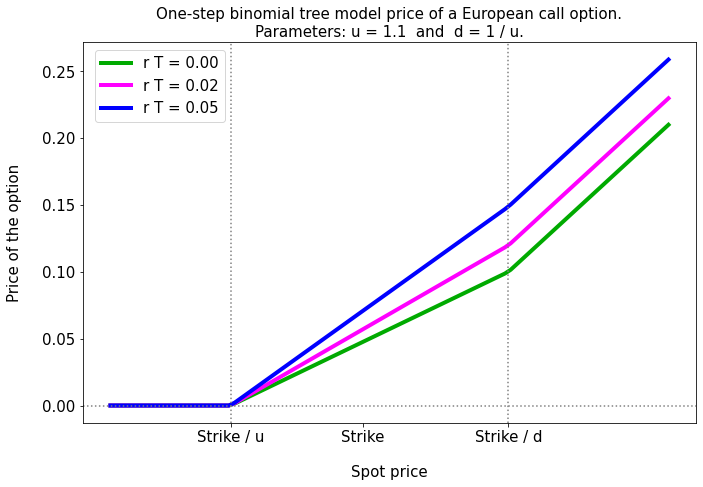

In [167]:
import numpy as np
import matplotlib.pyplot as plt


def plot_one_step_binom_call_price_vs_spot():
    """"
    Price of call option with the one-step binomial tree pricer as a function of the underlier's spot price.
    """

    # --- parameters ---
    u = 1.1
    d = 1.0 / u 
    K = 1.0
    S0_list = np.linspace(K * d * d, K * u * u, 100)
    T = 1.0
    r_list = 0.0, 0.02, 0.05
    color_list = '#00aa00', 'magenta', 'blue'
    my_fontsize = 15
    line_width = 4
    figsize = (11, 7)
    label_padding = 20
    
    # --- plotting ---
    plt.figure(figsize=figsize)
    for r, current_color in zip(r_list, color_list):
        option_prices = [call_option_price_one_step_binomial_tree(S0=S0, K=K, u=1.1, rT=r*T)['f']
                         for S0 in S0_list]
        plt.plot(S0_list, option_prices, label='r T = {:.2f}'.format(r * T), color=current_color, lw=line_width)

    plt.legend(bbox_to_anchor=(.02, .98), loc=2, borderaxespad=0., fontsize=my_fontsize)
    plt.title('One-step binomial tree model price of a European call option.\n'
              'Parameters: u = {}  and  d = 1 / u.'.format(u), fontsize=my_fontsize)
    plt.xlabel('Spot price', fontsize=my_fontsize, labelpad=label_padding)
    plt.ylabel('Price of the option', fontsize=my_fontsize, labelpad=label_padding)
    plt.axvline(K / u, c='gray', ls='dotted')
    plt.axvline(K * u, c='gray', ls='dotted')
    plt.axhline(0, c='gray', ls='dotted')

    ax = plt.gca()
    ax.set_xticks([K / u, K, K * u])
    ax.set_xticklabels(['Strike / u','Strike','Strike / d'], fontsize=my_fontsize)
    ax.tick_params(labelsize=my_fontsize)

    plt.show()


# plotting
plot_one_step_binom_call_price_vs_spot()

# Two-step binomial tree

###### Model description

Let's add another step to the time evolution of the underlier, so we now have two steps.

As before, $\,S\,$ is the price of the underlier, and $\,f\,$ is the price of the option.

<br/>

<center>
    <img src="./img/binom_2.png" width="450" alt="The two-step binomial tree pricer model">
    <br/>
    Two-step binomial tree pricer model
</center>


###### Solution

1. We keep $\,r\,$ the same, and one step now covers only a time length of $\,T\,\mathit{/}\,2\,$,
<br/>
so the parameter $\,p\,$ contains a division in the exponent:

$$
\displaystyle{p=\frac{e^{\,r\,T\,\color{red}{\mathit{/}\,2}}-d}{u-d}}
$$


2. As in the previous case, we can calculate the option's payoff values at maturity: $\,f_{u\,u}\,,\,f_{u\,d}\,,\,f_{d\,d}\,$.


$$
f_{u\,u}=\max\left(\,0\,,\,u^{\,2}\,S_{\,0}-K\,\right)
\\
f_{u\,d}=\max\left(\,0\,,\,u\,d\,S_{\,0}-K\,\right)
\\
f_{d\,d}=\max\left(\,0\,,\,d^{\,2}\,S_{\,0}-K\,\right)
$$


3. From the payoffs at maturity, $\,2\,T\,$, we can calculate the $\,f_{u}\,$ and $\,f_{d}\,$ prices at $\,T\,$, and from those the current price, $\,f\,$.

$$
f_u=\big(\,p\,f_{u\,u} + \left(\,1-p\,\right)\,f_{u\,d}\,\big)\,e^{\,-\,r\,T\,\color{red}{{\mathit /}\,2}}
\\
f_d=\big(\,p\,f_{u\,d} + \left(\,1-p\,\right)\,f_{d\,d}\,\big)\,e^{\,-\,r\,T\,\color{red}{{\mathit /}\,2}}
$$
<br/><center>and</center>
$$
f=\big(\,p\,f_u + \left(\,1-p\,\right)\,f_d\,\big)\,e^{\,-\,r\,T\,\color{red}{{\mathit /}\,2}}
$$


4. Substituting $\,f_u\,$ and $\,f_d\,$ into $\,f\,$ gives

$$
\color{red}{f=e^{\,-\,r\,T}\,\big(\,p^{\,2}f_{u\,u} + 2\,p\,\left(\,1-p\,\right)\,f_{u\,d} +  \left(\,1-p\,\right)^{\,2}\,f_{d\,d}\,\big)}
$$


## Pricer function with two-step tree

In [142]:
import numpy as np


def call_option_price_two_step_binomial_tree(S0=None, K=None, u=None, rT=None):
    """
    Risk-neutral pricing with a two-step binomial tree:
    European call option on a non-dividend paying underlying stock

    S0:        current stock price, also called: spot price
    K:         strike price
    u:         stock price multiplier for the upper end node, has to be above 1
    d = 1/u:   multiplier for the lower end node
    rT:        the constant risk-free rate multiplied by the time to maturity given in year fractions

    returns:   p: the probability of going up in the model, f: present value of the call option
    """

    # checking and setting values
    assert S0 > 0, 'spot has to be positive'
    assert K > 0, 'strike has to be positive'
    assert u > 1, 'u has to be > 1'
    d = 1.0 / u
    assert 0 < d < 1 , 'd has to be between 0 and 1'
    assert rT >= 0, 'r * T has to be zero or positive'
    assert u > np.exp(rT), 'u must be above exp(r * T)'

    # probability of going up
    p  = (np.exp(0.5 * rT) - d) / (u - d)

    # option payoffs at end nodes
    f_uu = np.maximum(0.0, u * u * S0 - K)  # option payoff at the top end state (node), reached by going up twice
    f_ud = np.maximum(0.0, u * d * S0 - K)  # option payoff at the middle end node
    f_dd = np.maximum(0.0, d * d * S0 - K)  # option payoff at the bottom end node

    # option price
    f  = np.exp(- 1.0 * rT) * (p * p * f_uu + 2.0 * p * (1.0 - p) * f_ud + (1.0 - p) * (1.0 - p) * f_dd)

    return {'p': p, 'f': f}


# baseline
assert 0.04108 == round(call_option_price_two_step_binomial_tree(S0=1.0, K=1.0, u=1.05, rT=0.03)['f'], 5)

## Plotting option price with one-step and two-step binomial tree

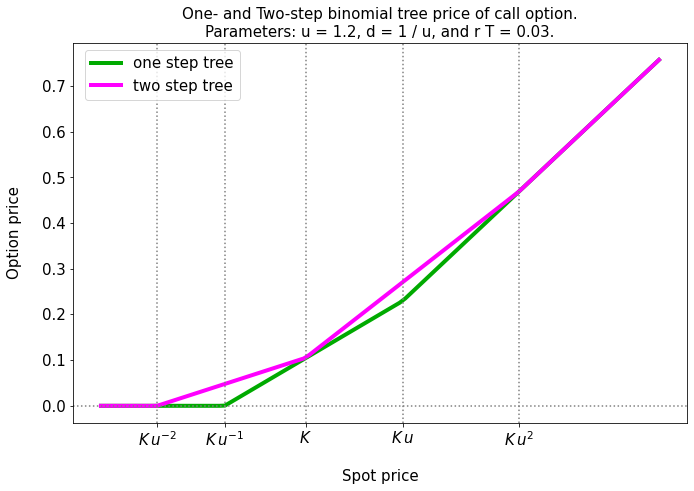

In [171]:
import numpy as np
import matplotlib.pyplot as plt


def plot_one_step_two_step_binom_call_price_vs_spot():
    """"
    Price of call option with the one-step binomial tree and the two-step binomial tree pricer 
    as a function of the underlier's spot price.
    """

    # --- parameters ---
    u = 1.2
    d = 1.0 / u 
    K = 1.0
    S0_list = np.linspace(K * d**3.0, K * u**3.0, 100)
    rT = 0.03
    colors = {'one-step': '#00aa00', 'two-step': 'magenta'}
    my_fontsize = 15
    line_width = 4
    figsize = (11, 7)
    label_padding = 20
    
    # --- plotting ---
    plt.figure(figsize=figsize)
    option_prices_one_step = [call_option_price_one_step_binomial_tree(S0=S0, K=K, u=u, rT=rT)['f'] for S0 in S0_list]
    plt.plot(S0_list, option_prices_one_step, label='one step tree', color=colors['one-step'], lw=line_width)
    option_prices_two_step = [call_option_price_two_step_binomial_tree(S0=S0, K=K, u=u, rT=rT)['f'] for S0 in S0_list]
    plt.plot(S0_list, option_prices_two_step, label='two step tree', color=colors['two-step'], lw=line_width)

    plt.legend(bbox_to_anchor=(.02, .98), loc=2, borderaxespad=0., fontsize=my_fontsize)
    plt.title('One- and Two-step binomial tree price of call option.\n'
              'Parameters: u = {}, d = 1 / u, and r T = {}.'.format(u, rT), fontsize=my_fontsize)
    plt.xlabel('Spot price', fontsize=my_fontsize, labelpad=label_padding)
    plt.ylabel('Option price', fontsize=my_fontsize, labelpad=label_padding)
    plt.axvline(K / (u * u), c='gray', ls='dotted')
    plt.axvline(K / u, c='gray', ls='dotted')
    plt.axvline(K, c='gray', ls='dotted')
    plt.axvline(K * u, c='gray', ls='dotted')
    plt.axvline(K * u * u, c='gray', ls='dotted')
    plt.axhline(0, c='gray', ls='dotted')

    ax = plt.gca()
    ax.set_xticks([K / (u * u), K / u, K, K * u, K * u * u])
    ax.set_xticklabels(['$K\,u^{-2}$', '$K\,u^{-1}$','$K$', '$K\,u$', '$K\,u^2$'], fontsize=my_fontsize)
    ax.tick_params(labelsize=my_fontsize)

    plt.show()


# plotting


plot_one_step_two_step_binom_call_price_vs_spot()

<span style='color:red;background-color:yellow;font-weight:bold;'>+ continue here</span>


# Binomial coefficients, Binomial distribution

Consider an $n$-step binomial tree without the $p$ and $(1-p)$ probabilities.

In how many different ways (along how many different paths) can you reach the uppermost final node? One. You have move "up" at each of the $n$ steps.

Along how many different paths can you reach the second end node from the top? Along $n$ paths. From the $n$ steps you have to select $1$ when you go "down", at all the other $n-1$ steps you go "up".

In how many different ways can you reach the $k$th end node from the top? Note that $0<k<n$. You have to select $k$ steps from the total of $n$ steps when you go "down", and in the other $n-k$ steps you will go "up". In other words, from the numbers $1,2,\dots,n$ you have to select $k$ different numbers. You can do this in $\displaystyle{\binom{n}{k}}$ ways, this is the called the binomial coefficient.

Now include the $p$ and $(1-p)$ probabilites along the arrows. The probability of reaching the $k$th end node from the top is
$$Prob\ (\ p,\ n,\ k\ )=\displaystyle{\binom{n}{k}}\ p^{\ k}\ \left(1-p\right)^{\ n\ -\ k}$$

This $P(p,n,k)$ is the binomial distribution. The expectation value (mean) of this distribution is $pn$. In the $\{n\rightarrow\infty,\ pn\rightarrow const.\}$ limit the center of this distribution around $pn$ converges to the normal distribution.

## Test: Binomial coefficients

In [109]:
# === Test: Binomial coefficients, For n=5 the correct output values are 1, 5, 10, 10, 5, 1 ===
from scipy import special
n = 5 # n: integer parameter of the binomial distribution
for i in (range(n+1)):
    print(special.binom(n,i).astype(int))

1
5
10
10
5
1


# Normalized n-step binomial tree for the risk-neutral calculation of the price of a European call option on a non-dividend-paying underlying stock

## Graphical explanation

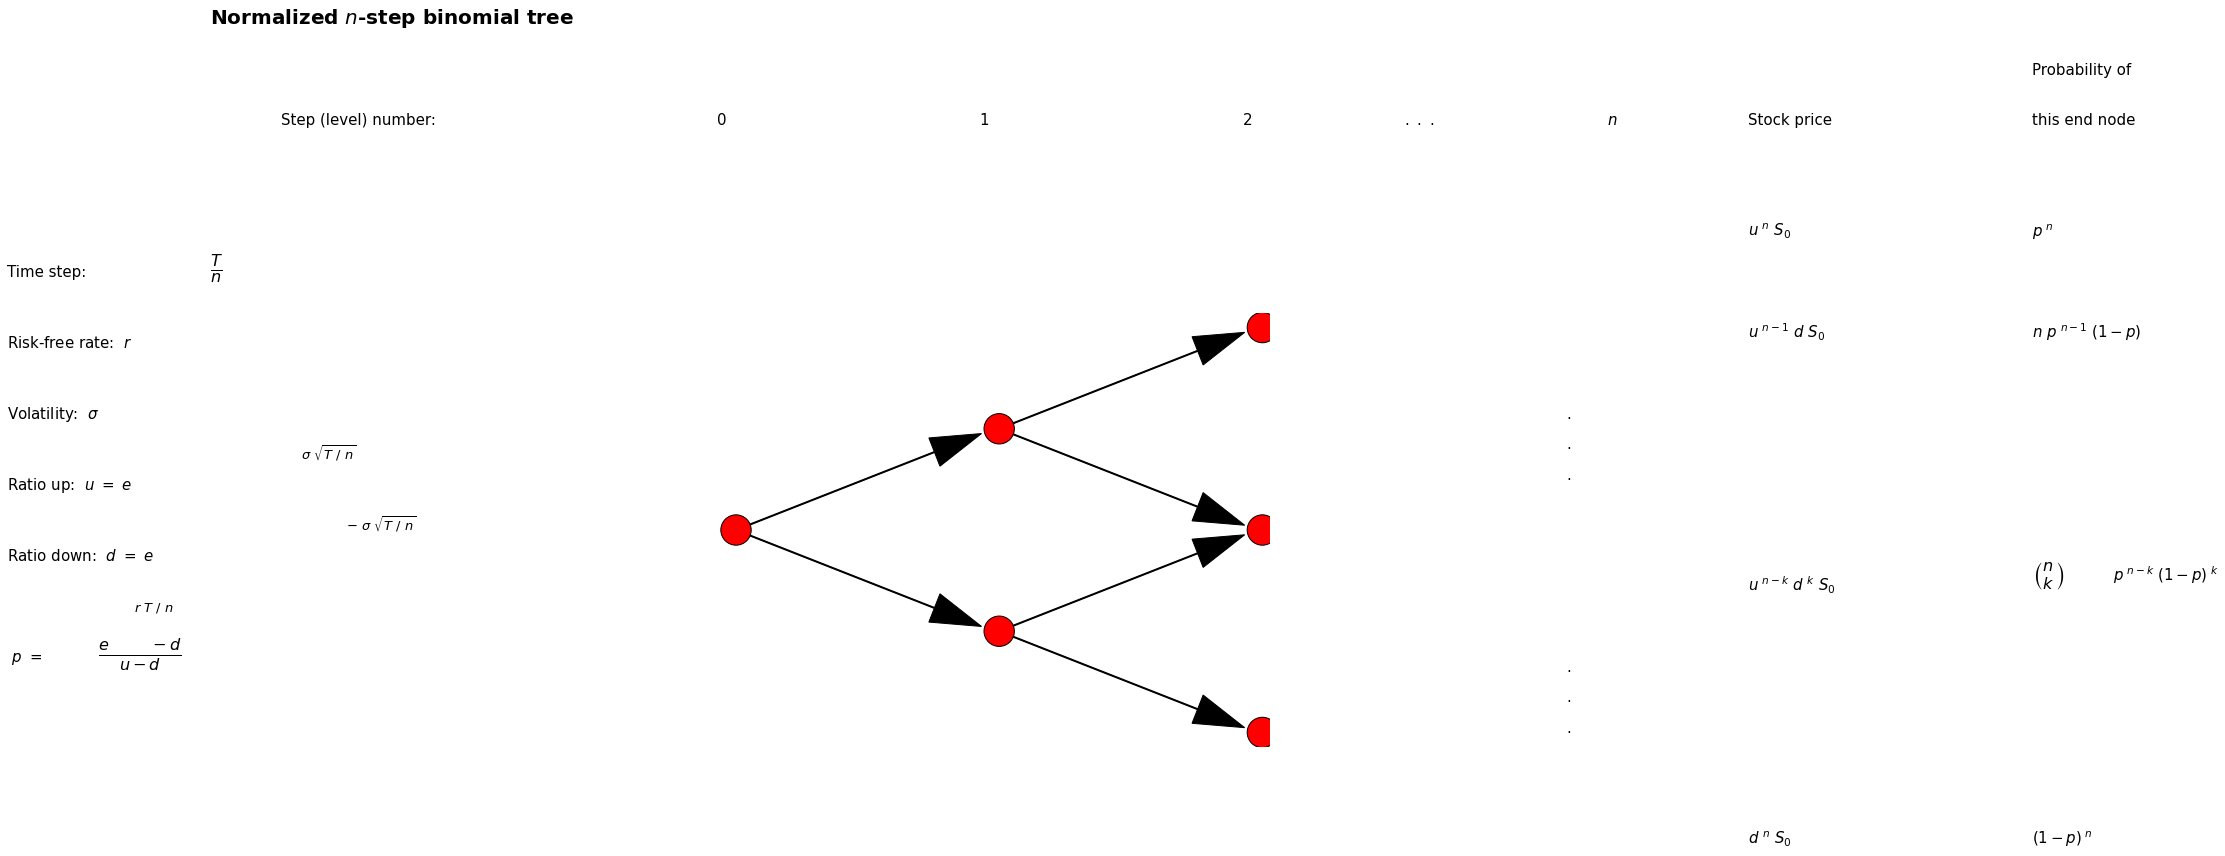

In [11]:
# === Image and text. No computation. ===

# === Importing libraries. Plot settings. ===
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
my_fontsize = 15 # font size for normal text
my_fontsize_title = 20 # title font size
my_fontsize_frac = 23 # font size for enlarging fractions that would be otherwise smaller than normal
my_fontsize_sup = 13 # smaller font for superscripts
plt.figure(figsize=(13, 8)) # resizing the figure
x,y,x2,y2 = -.3,-.25,0,-.15 # position variables

# === Circles ===
circle_start = Circle((x2+.02,y2+.5), .015, facecolor='r', edgecolor='k', lw=1, zorder=10)
circle_d  = Circle((x2+.28,y2+.4), .015, facecolor='r', edgecolor='k', lw=1, zorder=10)
circle_u  = Circle((x2+.28,y2+.6), .015, facecolor='r', edgecolor='k', lw=1, zorder=10)
circle_dd = Circle((x2+.54,y2+.3), .015, facecolor='r', edgecolor='k', lw=1, zorder=10)
circle_ud = Circle((x2+.54,y2+.5), .015, facecolor='r', edgecolor='k', lw=1, zorder=10)
circle_uu = Circle((x2+.54,y2+.7), .015, facecolor='r', edgecolor='k', lw=1, zorder=10)
circle_end_0 = Circle((x2+.895,y2+.8),  .015, facecolor='r', edgecolor='k', lw=1, zorder=10)
circle_end_1 = Circle((x2+.895,y2+.7),  .015, facecolor='r', edgecolor='k', lw=1, zorder=10)
circle_end_k = Circle((x2+.895,y2+.45), .015, facecolor='r', edgecolor='k', lw=1, zorder=10)
circle_end_n = Circle((x2+.895,y2+.2),  .015, facecolor='r', edgecolor='k', lw=1, zorder=10)
ax = plt.gca() # get current axes
ax.cla() # clear things for fresh plot
ax.set_aspect('equal') # set aspect ratio to 'equal' to keep the circles really circles
plt.axis('off') # no axes for this plot
ax.add_artist(circle_start)
ax.add_artist(circle_d)
ax.add_artist(circle_u)
ax.add_artist(circle_dd)
ax.add_artist(circle_ud)
ax.add_artist(circle_uu)
ax.add_artist(circle_end_0)
ax.add_artist(circle_end_1)
ax.add_artist(circle_end_k)
ax.add_artist(circle_end_n)

# === Arrows ===
ax.arrow(x2+.02, y2+.5, .196,  .077, head_width=.03, head_length=.05, fc='k', ec='k')
ax.arrow(x2+.02, y2+.5, .196, -.077, head_width=.03, head_length=.05, fc='k', ec='k')
ax.arrow(x2+.28, y2+.4, .196,  .077, head_width=.03, head_length=.05, fc='k', ec='k')
ax.arrow(x2+.28, y2+.4, .196, -.077, head_width=.03, head_length=.05, fc='k', ec='k')
ax.arrow(x2+.28, y2+.6, .196,  .077, head_width=.03, head_length=.05, fc='k', ec='k')
ax.arrow(x2+.28, y2+.6, .196, -.077, head_width=.03, head_length=.05, fc='k', ec='k')

# === Text and Math ===
ax.text(x-.2,   y+1.1,  r'Normalized $n$-step binomial tree', fontsize=my_fontsize_title, fontweight='bold')
ax.text(x-.13,  y+1,    r"Step (level) number:", fontsize=my_fontsize)
ax.text(x+.3,   y+1,    r"$0$", fontsize=my_fontsize)
ax.text(x+.56,  y+1,    r"$1$", fontsize=my_fontsize)
ax.text(x+.82,  y+1,    r"$2$", fontsize=my_fontsize)
ax.text(x+.98,  y+1,    r"$.\ .\ .$", fontsize=my_fontsize)
ax.text(x+1.18, y+1,    r"$n$", fontsize=my_fontsize)
ax.text(x+1.32, y+1,    r"Stock price", fontsize=my_fontsize)
ax.text(x+1.6,  y+1.05, r"Probability of", fontsize=my_fontsize)
ax.text(x+1.6,  y+1,    r"this end node", fontsize=my_fontsize)
ax.text(x-.4,   y+.85,  r"Time step:", fontsize=my_fontsize)
ax.text(x-.2,   y+.85,  r"$\frac{T}{n}$", fontsize=my_fontsize_frac)
ax.text(x-.4,   y+.78,  r"Risk-free rate: $\ r$", fontsize=my_fontsize)
ax.text(x-.4,   y+.71,  r"Volatility: $\ \sigma$", fontsize=my_fontsize)
ax.text(x-.4,   y+.64,  r"Ratio up: $\ u\ =\ e$", fontsize=my_fontsize)
ax.text(x-.11,  y+.67,  r"$\sigma\ \sqrt{T\ /\ n}$", fontsize=my_fontsize_sup)
ax.text(x-.4,   y+.57,  r"Ratio down: $\ d\ =\ e$", fontsize=my_fontsize)
ax.text(x-.065, y+.6,   r"$-\ \sigma\ \sqrt{T\ /\ n}$", fontsize=my_fontsize_sup)
ax.text(x-.4,   y+.47,  r"$\ p\ =$", fontsize=my_fontsize)
ax.text(x-.31,  y+.47,  r"$\frac{e^{\ \ \ \ \ \ \ \ \ \ \ } - d }{ u - d }$", fontsize=my_fontsize_frac)
ax.text(x-.275, y+.52,  r"$r\ T\ /\ n$", fontsize=my_fontsize_sup)
ax.text(x+1.32, y2+.79, r"$u^{\ n}\ S_0$", fontsize=my_fontsize)
ax.text(x+1.32, y2+.69, r"$u^{\ n-1}\ d\ S_0$", fontsize=my_fontsize)
ax.text(x+1.14, y2+.61, r".", fontsize=my_fontsize)
ax.text(x+1.14, y2+.58, r".", fontsize=my_fontsize)
ax.text(x+1.14, y2+.55, r".", fontsize=my_fontsize)
ax.text(x+1.32, y2+.44, r"$u^{\ n-k}\ d^{\ k}\ S_0$", fontsize=my_fontsize)
ax.text(x+1.14, y2+.36, r".", fontsize=my_fontsize)
ax.text(x+1.14, y2+.33, r".", fontsize=my_fontsize)
ax.text(x+1.14, y2+.30, r".", fontsize=my_fontsize)
ax.text(x+1.32, y2+.19, r"$d^{\ n}\ S_0$", fontsize=my_fontsize)
ax.text(x+1.6,  y2+.79, r"$p^{\ n}$", fontsize=my_fontsize)
ax.text(x+1.6,  y2+.69, r"$n\ p^{\ n-1}\ (1-p)$", fontsize=my_fontsize)
ax.text(x+1.6,  y2+.45, r"$\binom{n}{k}$", fontsize=my_fontsize_frac)
ax.text(x+1.68, y2+.45, r"$p^{\ n-k}\ (1-p)^{\ k}$", fontsize=my_fontsize)
ax.text(x+1.6,  y2+.19, r"$(1-p)^{\ n}$", fontsize=my_fontsize)

# === Display the entire plot ===
plt.show()

## Pricer function

In [11]:
# === Importing libraries ===
import numpy as np
from scipy import special

# === Definitions / General pricing formula ===
def call_binom_n_step_normalized(S0, K, sigma, r, T, n):
    ''' Function for an n-step binomial tree calculating the risk-neutral price 
        of a European call option on a non-dividend-paying underlying stock

    Attributes
    ==========
    S0:    float  current stock price, also called: spot price
    K:     float  strike price of the option
    sigma: float  volatility of the underlying stock
    r:     float  the constant risk-free short rate
    T:     float  the time to maturity given in year fractions
    n:     int    number of time steps

    Note
    ====
    sigma  has to be  >  0
    r      has to be  >  0

    Output
    ======
    p: model probability
    f: option price '''
    
    # --- Conversions --- 
    S0    = float(S0)
    K     = float(K)
    sigma = float(sigma)
    r     = float(r)
    T     = float(T)
    n     = int(n)
    u     = np.exp(sigma*np.sqrt(T/n))
    # Note: d = 1/u in this function
    
    # --- Checking constrains ---
    assert sigma > 0
    assert r > 0

    # --- Probability of going up, same at each step --- 
    p  = ( u * np.exp(r * T / n) - 1.0 ) / ( np.square(u) - 1.0 )

    # --- Option payoff values at the nodes of the (n)th level (also called: end nodes) --- 
    # Array indexing starts from the top: f_end[0] is the value at the node reached by going always up
    # The (n)th level of the tree has (n+1) nodes, thus, the argument of np.arange is (n+1)
    # For the option price at the (k)th end node, note that u^{n-k} * d^k = u^{n-2k}
    f_end = [ np.maximum( 0.0, np.power(u, n-2*k) * S0 - K ) for k in np.arange(n+1) ]

    # --- End node probabilities: binomial distribution --- 
    # Contains the binomial coefficients: special.binom(n,k)=(n atop k).
    # Make sure that  p_end  starts from the node with probability  p^n
    binomial_dist = [ special.binom(n,k) * np.power(p,n-k) * np.power(1.0-p,k) for k in np.arange(n+1) ]
                
    # --- Option price at t=0 with the n-step binomial tree ---
    f = np.exp( ( - 1.0 ) * r * T ) * np.dot( f_end, binomial_dist )

    # ---- Return the probability, p, and the option's calculated current price, f ---
    return p, f

## Plotting with different tree sizes, normalized n-step tree pricer

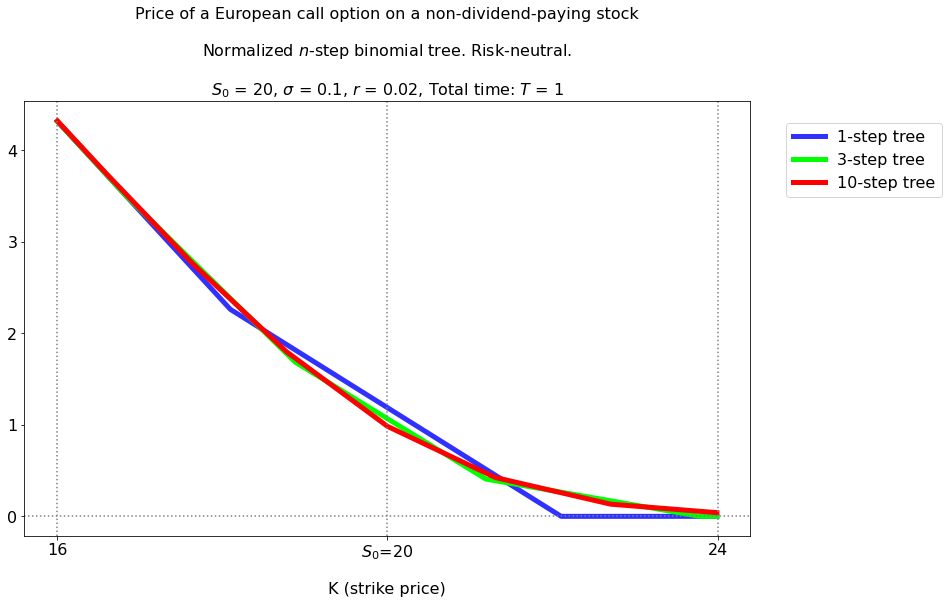

In [12]:
# === Importing libraries ===
import numpy as np
import matplotlib.pyplot as plt
import math

# === Definitions for Plotting ===
plt.figure(figsize=(13, 8)) # resizing the figure
my_fontsize = 16
r = 0.02 # risk-free rate
sigma = 0.1 # volatility parameter of the binomial tree model 
T = 1.0 # time to maturity of the option (in years)
color_list = ["#3030ff","#00ff00","#ff0000"] # colors for plotting
n_values = [1, 3, 10] # tree depth values ("tree depth": number of steps of the binomial tree)
S0 = 20 # current stock price
K_min = S0 * ( 1 - 2 * sigma ) # range of the horizontal (strike price) axis
K_max = S0 * ( 1 + 2 * sigma ) # range of the horizontal (strike price) axis
K_values = np.arange(K_min, K_max, (K_max-K_min)/1000.0) # range of strike price values to apply
S0_str = "{:.2g}".format(S0) # S0 converted to string
K_min_str = "{:.2g}".format(K_min)
K_max_str = "{:.2g}".format(K_max)
w = 5 # line width

# === Plotting the option price for each tree depth ===
for current_color, n in zip(color_list, n_values):
    # The list of calculated option price values for the n-step binomial tree
    f_list = [ call_binom_n_step_normalized(S0,K,sigma,r,T,n)[1] for K in K_values ]
    # plot the calculated curves for the option price
    plt.plot(K_values, f_list, label="%d-step tree" % n, color=current_color, linestyle='-', lw = w)

# === Plotting: Legend, Title, Axis label, Ticks ===
plt.legend(bbox_to_anchor=(1.05, .95), loc=2, borderaxespad=0., fontsize=my_fontsize) # legend position and font size
ax = plt.gca() # gca: get current axes, use this variable to access additional settings of the plot
ax.set_xticks([K_min,S0,K_max]) # tick positions along the horizontal axis
ax.set_xticklabels([K_min_str,"$S_0$="+S0_str,K_max_str], fontsize=my_fontsize) # tick labels 
plt.title("Price of a European call option on a non-dividend-paying stock\n\n"+  # plot title
         "Normalized $n$-step binomial tree. Risk-neutral.\n\n" +
          "$S_0$ = %g, $\sigma$ = %.1g, $r$ = %g, Total time: $T$ = %g" 
          % (S0, sigma, r, T), fontsize=my_fontsize)
plt.xlabel('K (strike price)', fontsize=my_fontsize, labelpad=20) # horizontal axis label
plt.tick_params(labelsize=my_fontsize) # tick text font size
plt.axhline(0, c='gray', ls='dotted') # horizontal zero axis, dotted
plt.axvline(K_min, c='gray', ls='dotted')
plt.axvline(S0, c='gray', ls='dotted')
plt.axvline(K_max, c='gray', ls='dotted')

# === Display the entire plot ===
plt.show()

## Plotting with different rates and volatilities

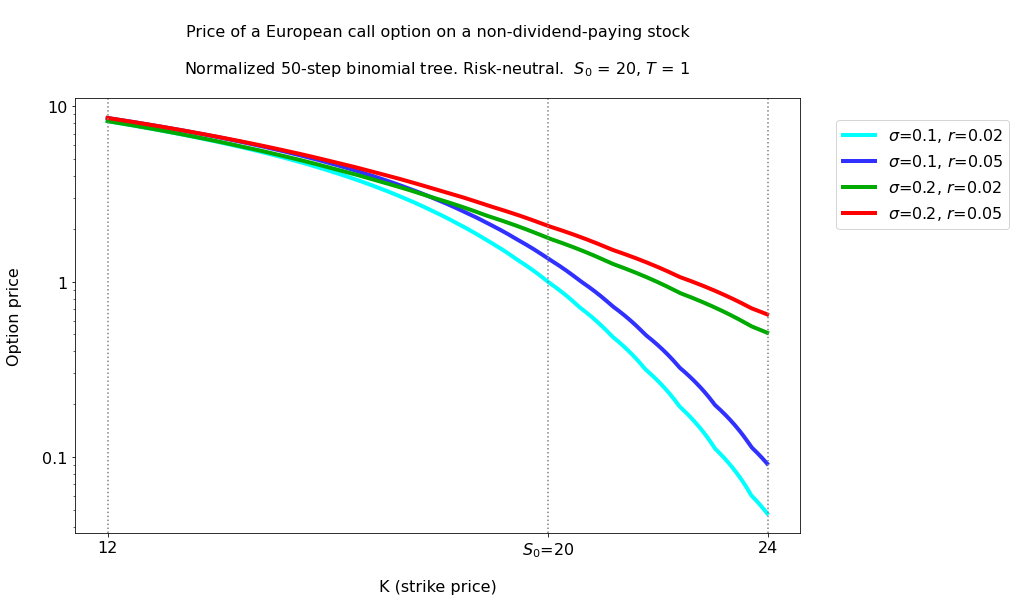

In [13]:
# === Think about the following ===
# (1) How does the price of the call option change with growing r (risk-free rate) ?
# (2) How does it change with growing sigma (volatility) ?

# === Importing libraries ===
import numpy as np
import matplotlib.pyplot as plt
import math
from matplotlib.ticker import FormatStrFormatter # for the semilog plot

# === Definitions for Plotting ===
plt.figure(figsize=(13, 8)) # resizing the figure
my_fontsize = 16
r_sigma_pair_list = ((.02,.1), (.05,.1), (.02,.2), (.05,.2)) # list of pairs: risk-free rate, volatility
T = 1.0 # time to maturity of the option (in years)
color_list = ["#00ffff","#3030ff","#00aa00","#ff0000"] # colors for plotting
n = 50 # tree depth: number of steps of the binomial tree
S0 = 20 # current stock price
K_min = S0 * 0.6 # range of the horizontal (strike price) axis
K_max = S0 * 1.2 # 
K_values = np.arange(K_min, K_max, (K_max-K_min)/1000.0) # range of strike price values to apply
S0_str = "{:.2g}".format(S0) # S0 converted to string
K_min_str = "{:.2g}".format(K_min)
K_max_str = "{:.2g}".format(K_max)

# === Plotting the option price for each tree depth ===
for current_color, (r, sigma) in zip(color_list, r_sigma_pair_list):
    # The list of calculated option price values for the n-step binomial tree
    f_list = [ call_binom_n_step_normalized(S0,K,sigma,r,T,n)[1] for K in K_values ]
    # Plot the calculated option price curve
    plt.semilogy(K_values, f_list, label="$\sigma$=%g, $r$=%g" % (sigma,r), color=current_color, linestyle='-', lw = 4)
    #plt.plot(K_values, f_list, label="$\sigma$=%g, $r$=%g" % (sigma,r), color=current_color, linestyle='-', lw = 4)

# === Plotting: Legend, Title, Axis label, Ticks ===
plt.legend(bbox_to_anchor=(1.05, .95), loc=2, borderaxespad=0., fontsize=my_fontsize) # legend position and font size
ax = plt.gca() # gca: get current axes, use this variable to access additional settings of the plot
ax.set_xticks([K_min,S0,K_max]) # tick positions along the horizontal axis
ax.set_xticklabels([K_min_str,"$S_0$="+S0_str,K_max_str], fontsize=my_fontsize) # tick labels 
plt.title("\nPrice of a European call option on a non-dividend-paying stock\n\n"+  # plot title
         "Normalized %d-step binomial tree. Risk-neutral.  $S_0$ = %g, $T$ = %g\n" % (n, S0, T), fontsize=my_fontsize)
plt.xlabel('K (strike price)', fontsize=my_fontsize, labelpad=20) # horizontal axis label
plt.ylabel('Option price', fontsize=my_fontsize, labelpad=20) # horizontal axis label
plt.tick_params(labelsize=my_fontsize) # tick text font size
plt.axhline(0, c='gray', ls='dotted') # horizontal zero axis, dotted
plt.axvline(K_min, c='gray', ls='dotted')
plt.axvline(S0, c='gray', ls='dotted')
plt.axvline(K_max, c='gray', ls='dotted')
ax.yaxis.set_major_formatter(FormatStrFormatter('%g')) # for the semilog plot

# === Display the entire plot ===
plt.show()

# Recommended reading

* [Arrow securities](https://en.wikipedia.org/wiki/Risk-neutral_measure#The_origin_of_the_risk-neutral_measure_(Arrow_securities)) - Can be viewed as the possible states (outcomes) of the price of the underlying at maturity
* Black Derman Toy model - a binomial tree for modeling stochastic (non-constant) rate
